IMPORTS

In [1]:
import os
import torch
import numpy as np
from torchvision import datasets, transforms, models
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"📦 Using device: {device}")

📦 Using device: cuda


TEST AND TRAIN DIRECTORY

In [4]:
train_dir = 'C:\\MY MEDICAL PROJECTS\\SKIN Diseases\\archive (3)\\SkinDisease\\SkinDisease\\train'
test_dir = 'C:\\MY MEDICAL PROJECTS\\SKIN Diseases\\archive (3)\\SkinDisease\\SkinDisease\\test'

IMAGE_SIZE = 224
BATCH_SIZE = 32

FEW TRANSFORMATIONS THAT ARE KNOWN

In [5]:
train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

test_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

COMPLETE DATA_SET LOADING

In [9]:
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

class_names = train_dataset.classes
print(f" Loaded {len(train_dataset)} training and {len(test_dataset)} test images")
print(f" Number of classes: {len(class_names)} → {class_names}")

 Loaded 13898 training and 1546 test images
 Number of classes: 22 → ['Acne', 'Actinic_Keratosis', 'Benign_tumors', 'Bullous', 'Candidiasis', 'DrugEruption', 'Eczema', 'Infestations_Bites', 'Lichen', 'Lupus', 'Moles', 'Psoriasis', 'Rosacea', 'Seborrh_Keratoses', 'SkinCancer', 'Sun_Sunlight_Damage', 'Tinea', 'Unknown_Normal', 'Vascular_Tumors', 'Vasculitis', 'Vitiligo', 'Warts']


DATA ANALYSIS AND VISUALS

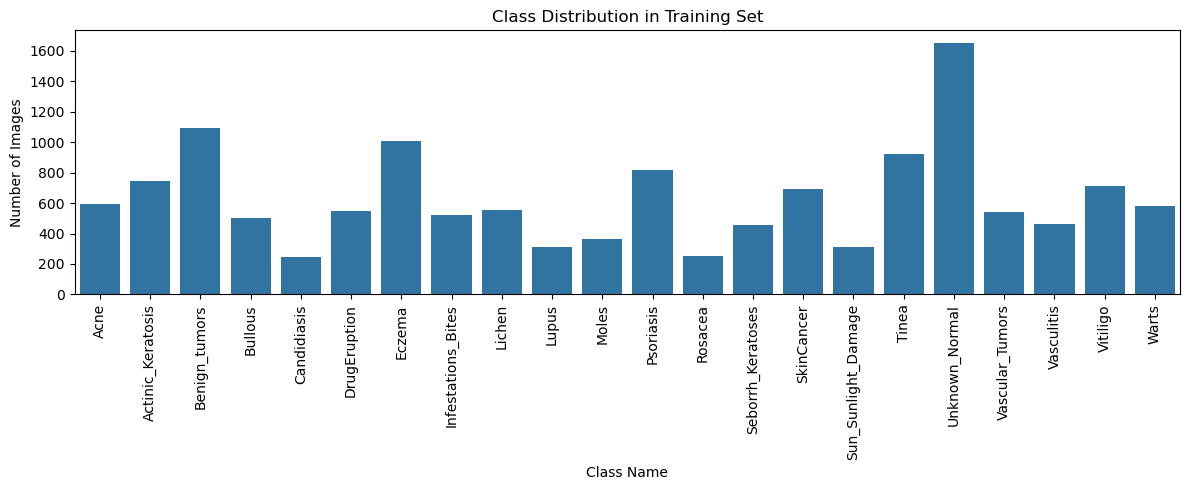

In [ ]:
import seaborn as sns
from collections import Counter


label_counts = Counter(train_dataset.targets)
plt.figure(figsize=(12, 5))
sns.barplot(x=[class_names[i] for i in label_counts.keys()], y=list(label_counts.values()))
plt.xticks(rotation=90)
plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Images")
plt.xlabel("Class Name")
plt.tight_layout()
plt.show()

VISUAL CHECK OF THE DATA LOADER

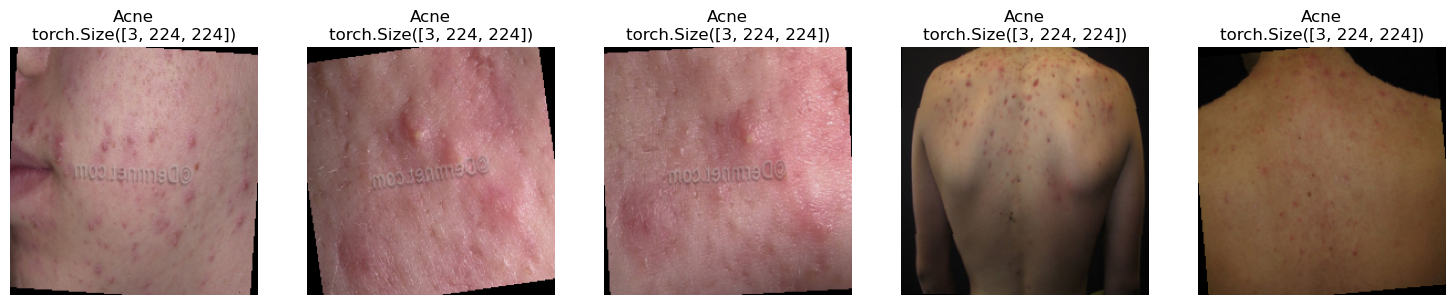

In [11]:
def visualize_samples(dataset, n=5):
    fig, axes = plt.subplots(1, n, figsize=(15, 3))
    for i in range(n):
        image, label = dataset[i]
        img_display = image.permute(1, 2, 0).numpy() * 0.5 + 0.5
        axes[i].imshow(img_display)
        axes[i].set_title(f"{class_names[label]}\n{image.shape}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

visualize_samples(train_dataset)

CHECK FOR IMAGE SHAPES OVER THE DATASET

In [13]:

shapes = [img[0].shape for img in train_dataset]
shape_counts = Counter(shapes)
print(" Image shapes in dataset:", shape_counts)

 Image shapes in dataset: Counter({torch.Size([3, 224, 224]): 13898})


FOR FAIR CONTRIBUTION OF EACH CLASS

In [14]:
labels = train_dataset.targets
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(labels),
                                     y=np.array(labels))
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
print(f"📊 Class weights tensor: {class_weights}")

📊 Class weights tensor: tensor([1.0653, 0.8446, 0.5780, 1.2534, 2.5473, 1.1549, 0.6255, 1.2056, 1.1424,
        2.0313, 1.7499, 0.7704, 2.4871, 1.3884, 0.9116, 2.0248, 0.6844, 0.3826,
        1.1634, 1.3703, 0.8848, 1.0892], device='cuda:0')
